1. Importar librerías y .csv. (2 punto) para ello:
-  Importe las librerías básicas para el análisis de datos
-  Descargue e importe el archivo nations.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set(rc={'figure.figsize':(9, 4)})

In [2]:
df = pd.read_csv('nations.csv', encoding='iso-8859-1', index_col=0)

In [24]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    # Esto al final genera 2 poblaciones de datos, los que estan sobre la media (1), y los que estan
    # igual o bajo la media (0).
    # Ademas, obtiene los datos asociados a 1 y 0
    grid = sns.FacetGrid(tmp, col='binarize', sharex=False, sharey=False, height=4)
    grid.map(sns.histplot, variable, color='lightgrey', alpha=0.6, lw=0)

    grid.axes[0][0].axvline(np.mean(hist_0))
    grid.axes[0][0].title.set_text(f'{variable} <= {np.mean(tmp[variable]):.2f}')

    grid.axes[0][1].axvline(np.mean(hist_1))
    grid.axes[0][1].title.set_text(f'{variable} > {np.mean(tmp[variable]):.2f}')
    plt.show()

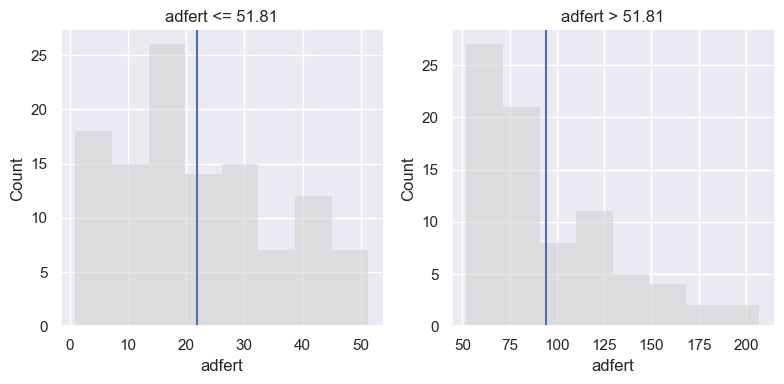

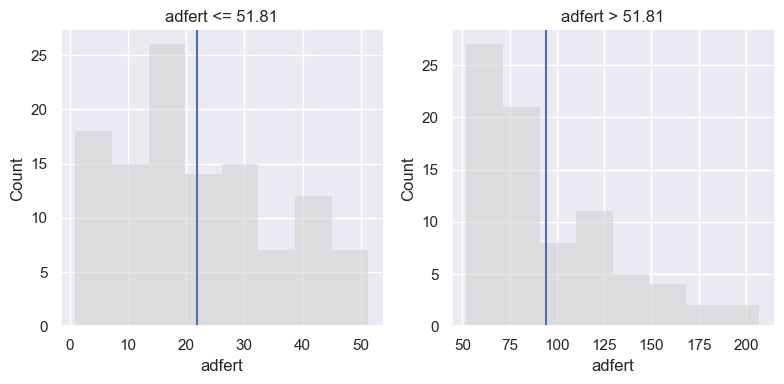

In [25]:
binarize_histogram(df, 'adfert')

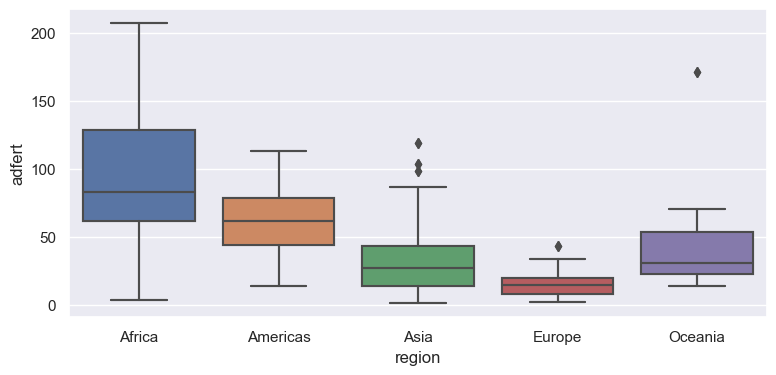

In [6]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    sns.boxplot(data=tmp, x=group_by, y=variable)
    plt.show()

grouped_boxplot(df, 'adfert', 'region')


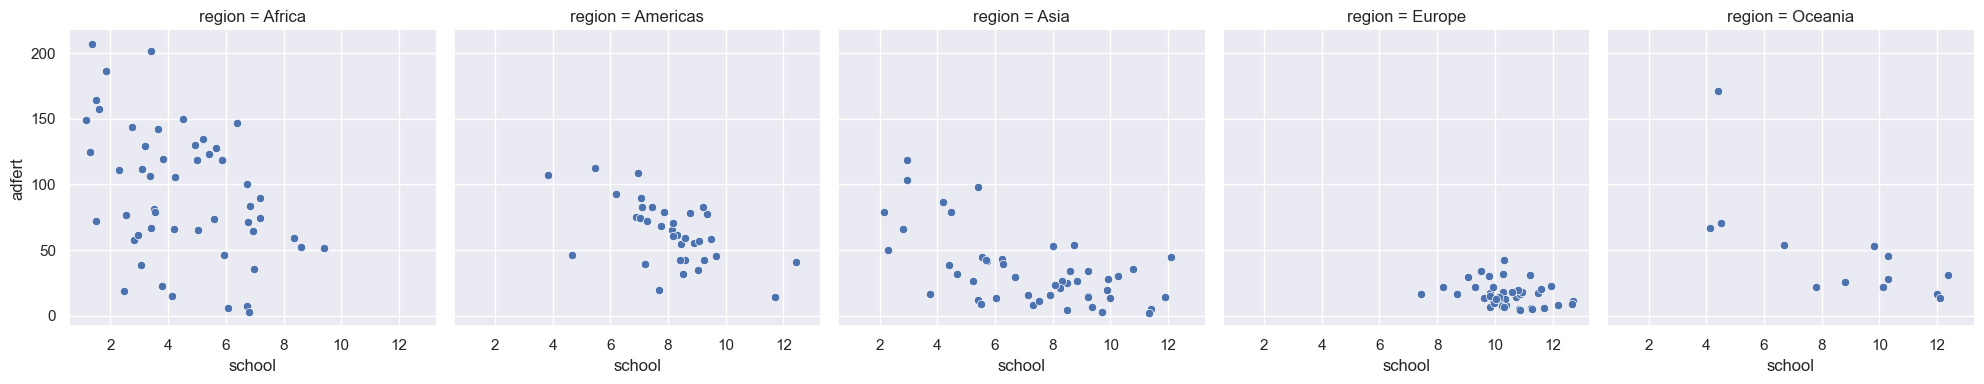

In [7]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    grid = sns.FacetGrid(tmp, col=group_by, height=4)
    grid.map(sns.scatterplot, x, y)
    plt.show()

grouped_scatterplot(df, 'school', 'adfert', 'region')

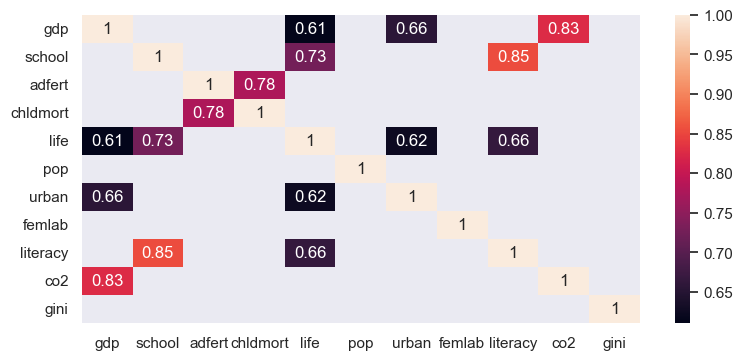

In [27]:
matriz_correlacion = df.drop(columns='binarize').corr()
menores_6 = matriz_correlacion <= 0.6
sns.heatmap(matriz_correlacion, mask=menores_6, annot=True)
plt.show()

# En el siguiente heatmap se pueden ver las variables que tienen una correlacion mayor a 0.6
# Se puede ver que gdp con co2/urban/life tienen una correlacion mayor a 0.6
# Se puede ver que school con literacy/life tienen una correlacion mayor a 0.6
# Se puede ver que adfert con chldmort tienen una correlacion mayor a 0.6
# Se puede ver que life con literacy/urban tienen una correlacion mayor a 0.6

In [28]:
variables_con_correlacion = ['region', 'gdp', 'co2', 'life', 'school', 'adfert', 'chldmort',
                             'literacy', 'urban']

df_variables_correlacion = df.loc[:, variables_con_correlacion]

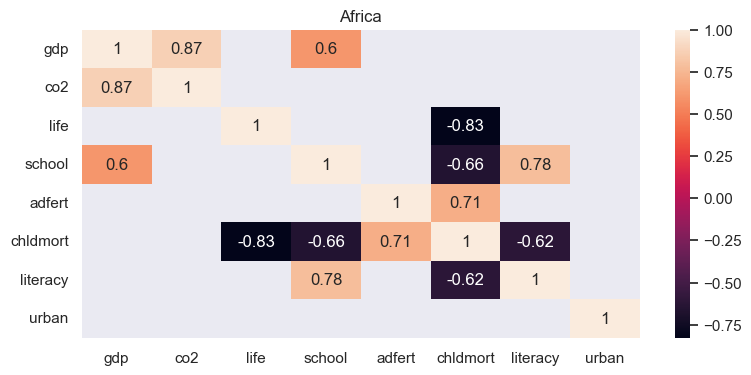

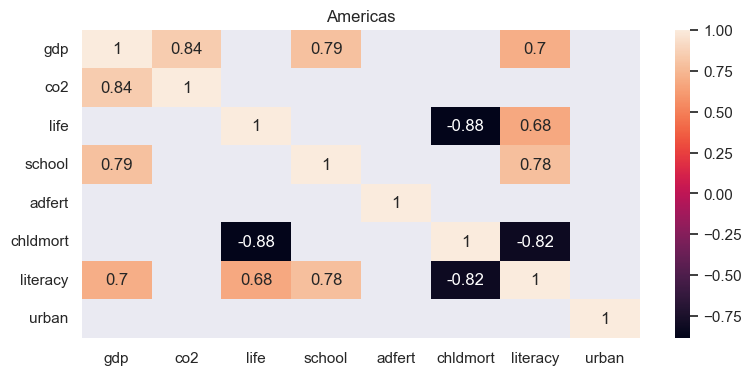

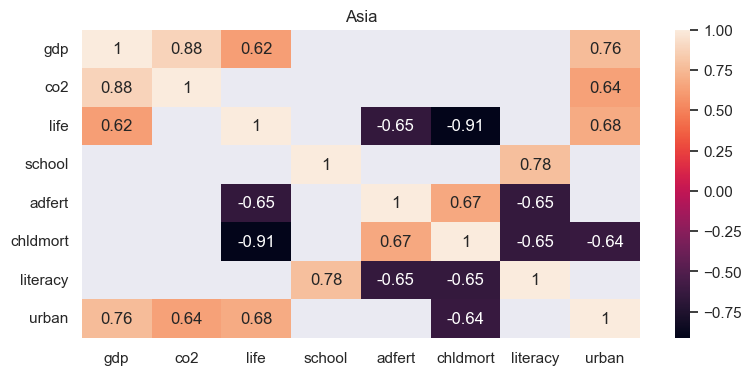

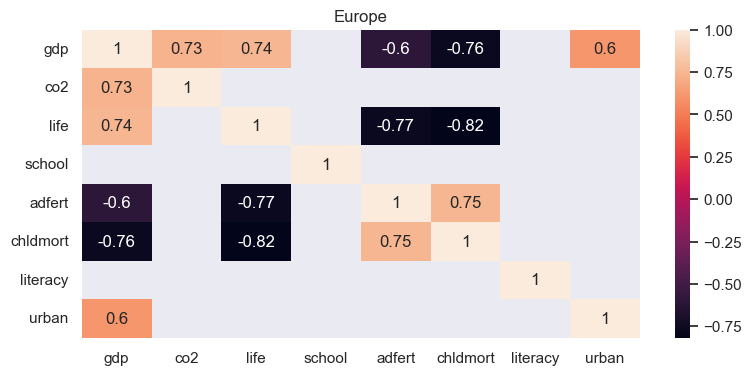

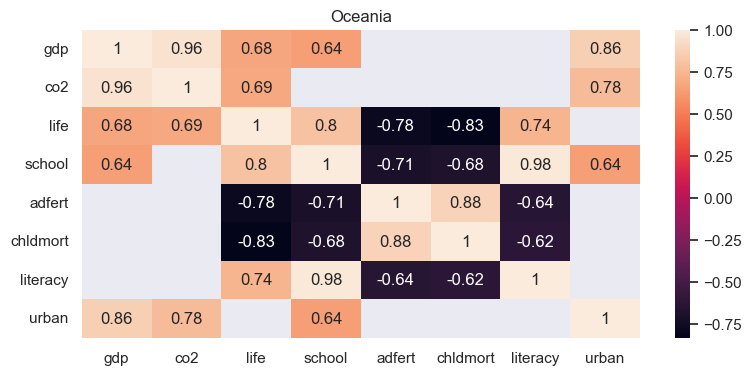

In [36]:
for valor_region in df_variables_correlacion['region'].unique():
    matriz = df_variables_correlacion.query('region == @valor_region').corr()
    mask_entre_06 = (matriz >= -0.6) & (matriz <= 0.6)
    sns.heatmap(matriz, annot=True, mask=mask_entre_06)
    plt.title(valor_region)
    plt.show()

'''
El analisis se hara en base a un criterio de correlacion menor a -0.6 y mayor a 0.6

Africa:
  - Correlaciones positivas: gdp con school/co2; school con literacy; adfert con chldmort
  - Correlaciones negativas: life con chldmort; school con chldmort; chldmort con literacy

Americas:
  - Correlaciones postivias: gdp con literacy/school/co2; life con literacy; school con literacy
  - Correlaciones negativas: life con chldmrt; chldmort con literacy

Asia:
  - Correlaciones positivas: gdp con urban/life/co2; co2 con urban; life con urban; school con literacy; adfert con chldmort
  - Correlaciones negativas: life con chldmort/adfert; adfert con literacy; chldmort con urban/literacy
  
Europe:
  - Correlaciones positivas: gdap con urban/life/co2; adfert con chldmrt
  - Correlaciones negativas: gdp con chldmort/adfert; life con chldmort/adfert
  
Oceania:
  - Correlaciones positivas: gdp con school/life/co2; co2 con urban/life/; life con literacy/school; school con urban/literacy; adfert con chldmort
  - Correlaciones negativas: life con chldmort/adfert; school con chldmort/adfert; adfert con literacy; chldmort con literacy'''